C:\Users\ooo63\AppData\Local\Temp\ipykernel_30812\3156848251.py:71: DtypeWarning: Columns (19,20,21,22,23,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data3=pd.read_csv('hitting_player_by_scrapping_2003-23.csv')


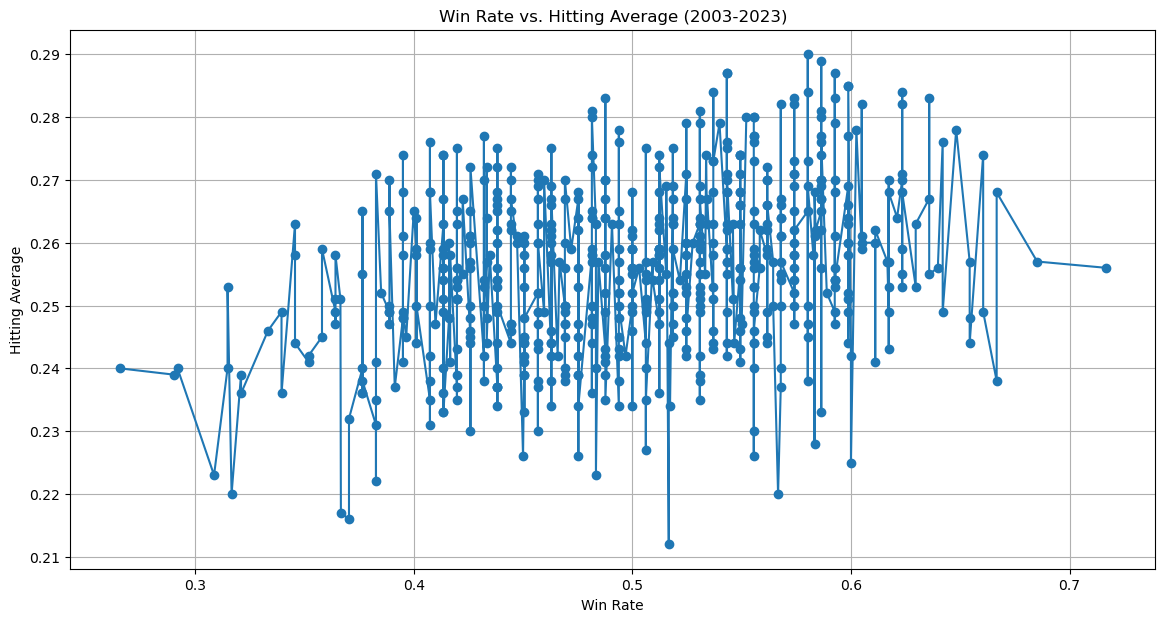

c:\Users\ooo63\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


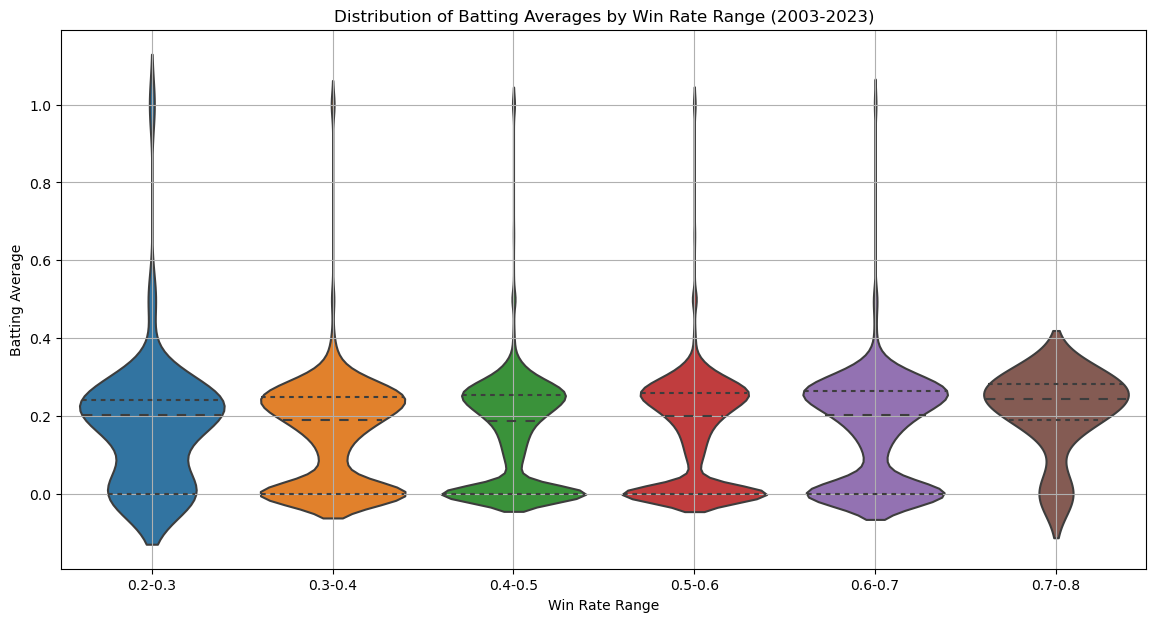

C:\Users\ooo63\AppData\Local\Temp\ipykernel_30812\3156848251.py:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  HR=merged_data2.groupby('Win Rate Bin')['HR'].sum().reset_index()
c:\Users\ooo63\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


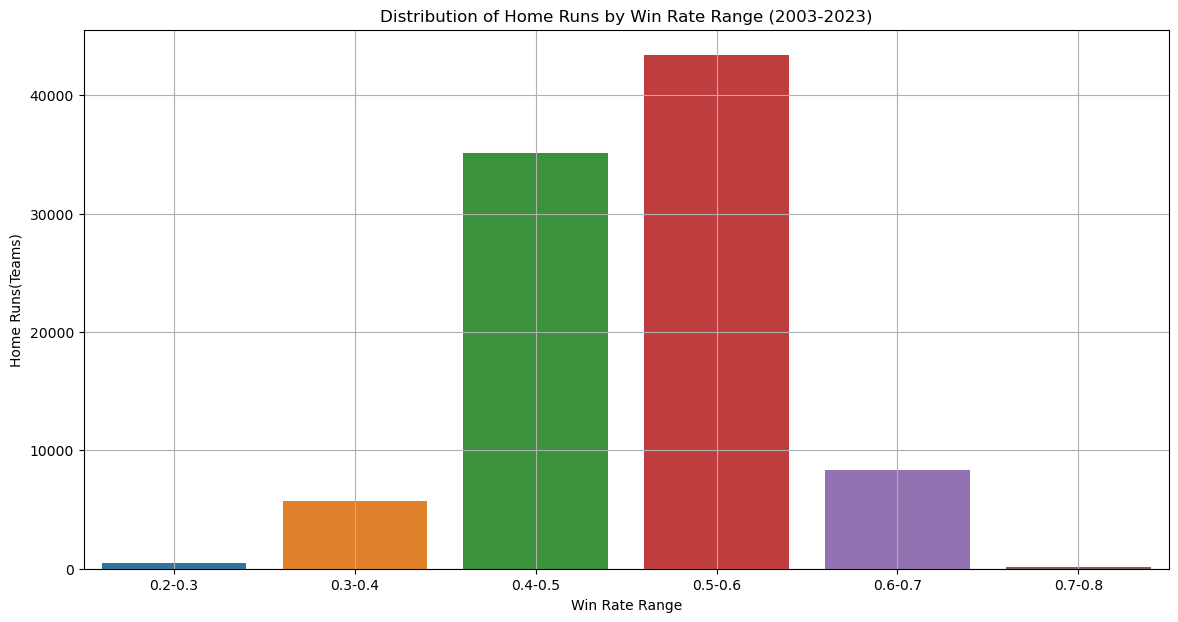

c:\Users\ooo63\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ooo63\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


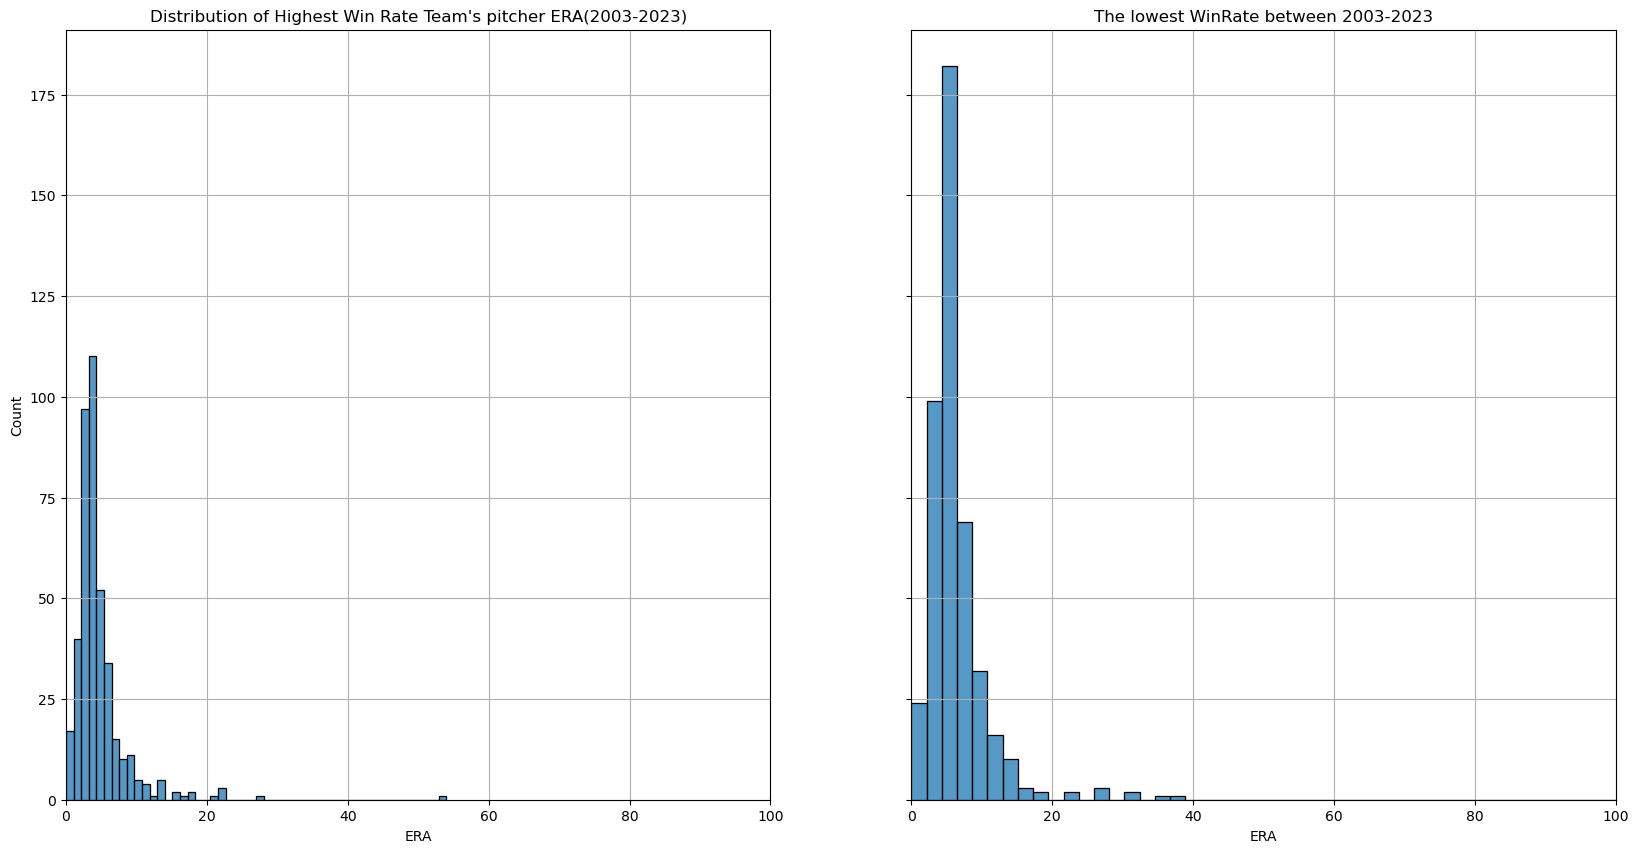

c:\Users\ooo63\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ooo63\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


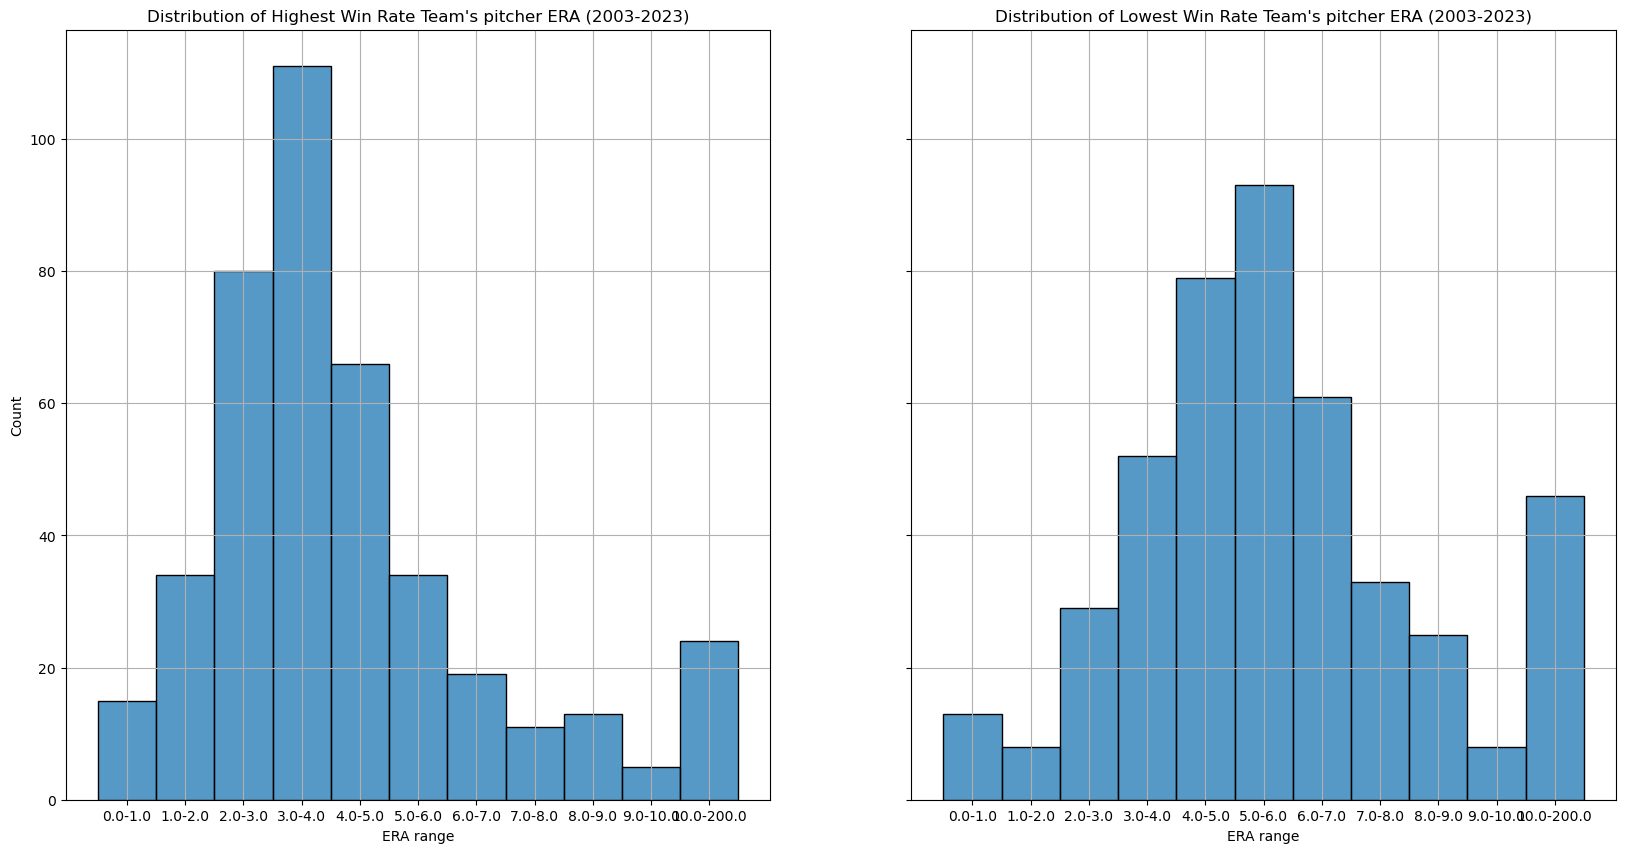

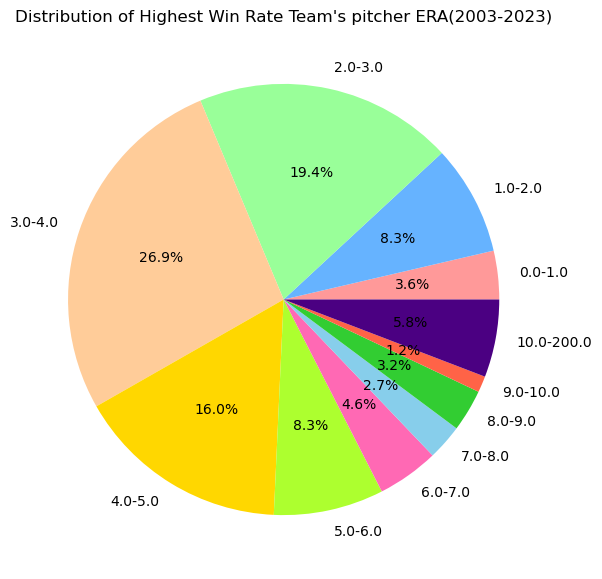

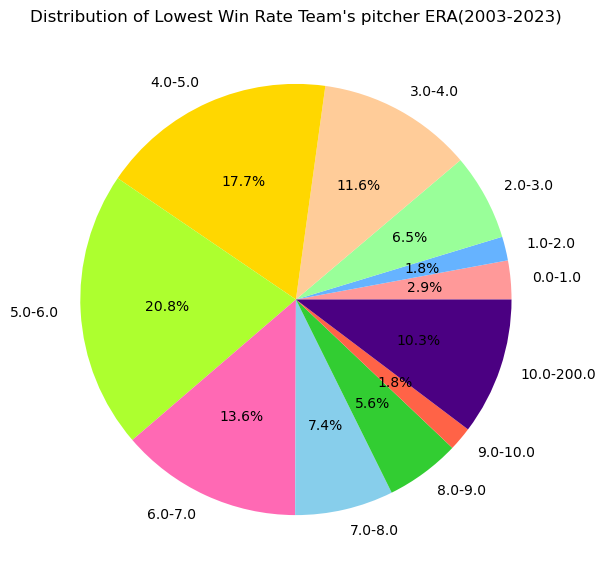

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

team_abbr = {
    'New York Yankees': 'NYY',
    'Boston Red Sox': 'BOS',
    'Toronto Blue Jays': 'TOR',
    'Baltimore Orioles': 'BAL',
    'Tampa Bay Rays': 'TB',
    'Chicago White Sox': 'CHW',
    'Cleveland Indians': 'CLE',
    'Detroit Tigers': 'DET',
    'Kansas City Royals': 'KC',
    'Minnesota Twins': 'MIN',
    'Houston Astros': 'HOU',
    'Los Angeles Angels': 'LAA',
    'Oakland Athletics': 'OAK',
    'Seattle Mariners': 'SEA',
    'Texas Rangers': 'TEX',
    'Atlanta Braves': 'ATL',
    'Miami Marlins': 'MIA',
    'New York Mets': 'NYM',
    'Philadelphia Phillies': 'PHI',
    'Washington Nationals': 'WSH',
    'Chicago Cubs': 'CHC',
    'Cincinnati Reds': 'CIN',
    'Milwaukee Brewers': 'MIL',
    'Pittsburgh Pirates': 'PIT',
    'St. Louis Cardinals': 'STL',
    'Arizona Diamondbacks': 'ARI',
    'Colorado Rockies': 'COL',
    'Los Angeles Dodgers': 'LAD',
    'San Diego Padres': 'SD',
    'San Francisco Giants': 'SF',
    'Baltimore Orioles': 'BAL',
    'Boston Red Sox': 'BOS',
    'Chicago White Sox': 'CHW',
    'Cincinnati Reds': 'CIN',
    'Cleveland Indians': 'CLE',
    'Colorado Rockies': 'COL',
    'Detroit Tigers': 'DET',
    'Houston Astros': 'HOU',
    'Kansas City Royals': 'KC',
    'Los Angeles Angels': 'LAA',
    'Miami Marlins': 'MIA',
    'Milwaukee Brewers': 'MIL',
    'Minnesota Twins': 'MIN',
    'New York Mets': 'NYM',
    'Oakland Athletics': 'OAK',
    'Philadelphia Phillies': 'PHI',
    'Pittsburgh Pirates': 'PIT',
    'San Diego Padres': 'SD',
    'San Francisco Giants': 'SF',
    'Seattle Mariners': 'SEA',
    'St. Louis Cardinals': 'STL',
    'Tampa Bay Rays': 'TB',
    'Texas Rangers': 'TEX',
    'Toronto Blue Jays': 'TOR',
    'Washington Nationals': 'WSH'
}

def cleanText(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    return cleaned_text


data = pd.read_csv('pitching_team_by_scrapping_2003-23.csv')
data2 = pd.read_csv('hitting_team_by_scrapping_2003-23.csv')
data3=pd.read_csv('hitting_player_by_scrapping_2003-23.csv')
data4=pd.read_csv('pitching_player_by_scrapping_2003-23.csv')


data['Win Rate'] = data['W'] / (data['W'] + data['L'])
data['TEAM']=data['TEAM'].apply(cleanText)
data2['TEAM'] = data2['TEAM'].apply(cleanText)

win_rate_bins = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
win_rate_labels = ['0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8']
data['Win Rate Bin'] = pd.cut(data['Win Rate'], bins=win_rate_bins, labels=win_rate_labels, include_lowest=True)

data_relevant = data[['Season Year', 'TEAM', 'Win Rate','Win Rate Bin']].rename(columns={'TEAM': 'Team'})


data2_relevant = data2[['Season Year', 'TEAM', 'AVG','HR']].rename(columns={'AVG': 'Hitting Average', 'TEAM': 'Team'})

merged_data = pd.merge(data_relevant, data2_relevant, on=['Season Year', 'Team'], how='inner')
plt.figure(figsize=(14, 7))
merged_data = merged_data.sort_values(by='Win Rate')

#1
#sns.lineplot(data=merged_data, x='Win Rate', y='Hitting Average', marker='o')
plt.plot(merged_data['Win Rate'],merged_data['Hitting Average'],marker='o',linestyle='-')
plt.title('Win Rate vs. Hitting Average (2003-2023)')
plt.xlabel('Win Rate')
plt.ylabel('Hitting Average')
plt.grid(True)
plt.show()




data3_relevant=data3[['Season Year','TEAM','AVG','HR']].rename(columns={'TEAM': 'Team abbr'})
data['Team abbr'] = data['TEAM'].map(team_abbr)
data_relevant=data[['Season Year', 'Team abbr', 'Win Rate','Win Rate Bin']]
merged_data2=pd.merge(data_relevant,data3_relevant,on=['Season Year', 'Team abbr'],how='inner')
plt.figure(figsize=(14, 7))
sns.violinplot(data=merged_data2, x='Win Rate Bin', y='AVG', inner='quartile', scale='width')
plt.title('Distribution of Batting Averages by Win Rate Range (2003-2023)')
plt.xlabel('Win Rate Range')
plt.ylabel('Batting Average')
plt.grid(True)
plt.show()
#2
HR=merged_data2.groupby('Win Rate Bin')['HR'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=HR,x='Win Rate Bin', y='HR')
plt.title('Distribution of Home Runs by Win Rate Range (2003-2023)')
plt.xlabel('Win Rate Range')
plt.ylabel('Home Runs(Teams)')
plt.grid(True)
plt.show()

max=data.groupby('Season Year')['Win Rate'].idxmax()
min=data.groupby('Season Year')['Win Rate'].idxmin()
max_data=data.loc[max]
min_data=data.loc[min]

data4_relevant=data4[['Season Year','TEAM','ERA']].rename(columns={'TEAM':'Team abbr','ERA':'personal ERA'})
data4_relevant['personal ERA'] = pd.to_numeric(data4_relevant['personal ERA'], errors='coerce')
data4_relevant = data4_relevant.dropna(subset=['personal ERA'])

era_bins = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,200.0]
era_labels = ['0.0-1.0','1.0-2.0','2.0-3.0','3.0-4.0','4.0-5.0', '5.0-6.0','6.0-7.0','7.0-8.0','8.0-9.0','9.0-10.0', '10.0-200.0']

merged_data3=pd.merge(max_data,data4_relevant,on=['Season Year','Team abbr'],how='inner')
merged_data3['personal ERA'] = pd.to_numeric(merged_data3['personal ERA'], errors='coerce')
merged_data3.dropna(subset=['personal ERA'])
merged_data3['ERA Bin'] = pd.cut(merged_data3['personal ERA'], bins=era_bins, labels=era_labels, include_lowest=True)

merged_data4=pd.merge(min_data,data4_relevant,on=['Season Year','Team abbr'],how='inner')
merged_data4['personal ERA'] = pd.to_numeric(merged_data4['personal ERA'], errors='coerce')
merged_data4.dropna(subset=['personal ERA'])
merged_data4['ERA Bin'] = pd.cut(merged_data4['personal ERA'], bins=era_bins, labels=era_labels, include_lowest=True)

#3
fig,axes=plt.subplots(1,2,figsize=(20,10),sharey=True)

sns.histplot(x=merged_data3['personal ERA'],bins=50,ax=axes[0])
axes[0].set_title('Distribution of Highest Win Rate Team\'s pitcher ERA(2003-2023)')
axes[0].set_xlim(0,100)
axes[0].set_xlabel('ERA')
axes[0].set_ylabel('Count')
axes[0].grid(True)

sns.histplot(merged_data4['personal ERA'], bins=50, ax=axes[1])
axes[1].set_title("The lowest WinRate between 2003-2023")
axes[1].set_xlim(0,100)
axes[1].set_xlabel('ERA')
axes[1].set_ylabel('Count')
axes[1].grid(True)
plt.show()

fig,axes=plt.subplots(1,2,figsize=(20,10),sharey=True)
sns.histplot(x=merged_data3['ERA Bin'], kde=False, ax=axes[0])
axes[0].set_title("Distribution of Highest Win Rate Team's pitcher ERA (2003-2023)")
axes[0].set_xlabel('ERA range')
axes[0].set_ylabel('Count')
axes[0].grid(True)

# 勝率最低球隊的投手ERA分佈圖
sns.histplot(x=merged_data4['ERA Bin'], kde=False, ax=axes[1])
axes[1].set_title("Distribution of Lowest Win Rate Team's pitcher ERA (2003-2023)")
axes[1].set_xlabel('ERA range')
axes[1].set_ylabel('Count')
axes[1].grid(True)
plt.show()


max_count=merged_data3['ERA Bin'].value_counts().sort_index()
min_count=merged_data4['ERA Bin'].value_counts().sort_index()

colors = ['#FF9999','#66B3FF','#99FF99','#FFCC99','#FFD700','#ADFF2F','#FF69B4','#87CEEB','#32CD32','#FF6347','#4B0082']
#4
plt.figure(figsize=(14, 7))
plt.pie(max_count, labels=max_count.index, autopct='%1.1f%%',colors=colors)
plt.title("Distribution of Highest Win Rate Team\'s pitcher ERA(2003-2023)")
plt.show()


plt.figure(figsize=(14, 7))
plt.pie(min_count, labels=min_count.index, autopct='%1.1f%%',colors=colors)
plt.title("Distribution of Lowest Win Rate Team\'s pitcher ERA(2003-2023)")
plt.show()